In [1]:
import rebound
import numpy as np
import os
import time
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from rebound.plotting import fading_line
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1,a=5,primary=sim.particles[0])
sim.add(m=1e-3,a=0.5,e=0.05,primary=sim.particles[0],f=1)    
sim.add(m=1e-3,a=1.25,e=0.1,primary=sim.particles[0],f=2)    
sim.add(m=1e-3,a=0.5,e=0.05,primary=sim.particles[1],f=3)
sim.add(m=1e-3,a=1.25,e=0.1,primary=sim.particles[1],f=4)
sim.add(m=1e-3,a=10,e=0.,f=6)
sim.add(m=1e-3,a=15,e=0.,f=7)
sim.move_to_com()
sim.N_active = sim.N
if False:
    for i in range(200):
        sim.add(m=0, a=np.random.uniform(0.4,2.5),f=np.random.uniform(0.,np.pi*2.),e=0.06*np.random.uniform(),inc=0.04*np.random.normal(),primary=sim.particles[0])
    for i in range(200):
        sim.add(m=0, a=np.random.uniform(0.4,2.5),f=np.random.uniform(0.,np.pi*2.),e=0.06*np.random.uniform(),inc=0.04*np.random.normal(),primary=sim.particles[1])
    for i in range(200):
        sim.add(m=0, a=np.random.uniform(7.5,17),f=np.random.uniform(0.,np.pi*2.),e=0.06*np.random.uniform(),inc=0.04*np.random.normal())

In [3]:
P0=sim.particles[2].calculate_orbit(primary=sim.particles[0]).P
P0

2.220331580691602

In [4]:
def run(dt,setting):
    n0, N_dominant,Nmaxshells, phi0, phi1 = setting
    sim2 = sim.copy()
    sim2.dt = dt
    sim2.ri_mercurana.kappa0 = 0.05
    sim2.ri_mercurana.kappa1 = 0.05
    sim2.ri_mercurana.phi0 = phi0
    sim2.ri_mercurana.phi1 = phi1
    sim2.ri_mercurana.n0 = n0
    sim2.ri_mercurana.n1 = 0
    sim2.ri_mercurana.safe_mode = 0    
    sim2.ri_mercurana.Nmaxshells = Nmaxshells
    sim2.ri_mercurana.N_dominant = N_dominant
    sim2.integrator = "mercurana"

    times = np.linspace(0.,0.1*1234.56,100)
    E0 = sim2.calculate_energy()
    E = 0.
    start = time.perf_counter()
    for i, t in enumerate(times):
        sim2.integrate(t,exact_finish_time=False)
        E1 = sim2.calculate_energy()
        E = max(E,np.abs((E1-E0)/E0))
    return E, time.perf_counter()-start, sim2.ri_mercurana.Nmaxshellused

In [5]:
settings = [[0,0,1,"lf",None],[0,0,1,"lf4",None],[8,2,2,"lf","lf"],[8,2,2,"lf4","lf4"]]
dts = np.logspace(-2,1,100)
res = np.zeros((len(dts),len(settings),3))

for i, dt in enumerate(dts):
    for j, setting in enumerate(settings):
        #print(dt, setting)
        res[i,j] = run(dt,setting)

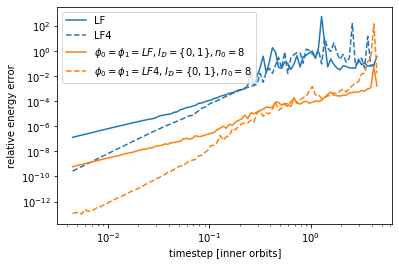

In [6]:
fig, ax = plt.subplots(1,1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("timestep [inner orbits]")
ax.set_ylabel("relative energy error")
for j, setting in enumerate(settings):
    n0, N_dominant,Nmaxshells, phi0, phi1 = setting
    label = "%s"%setting
    ls = "-"
    color = colors[0]
    if n0==0 and phi0=="lf":
        label = "LF"
    if n0==0 and phi0=="lf4":
        label = "LF4"        
        ls = "--"
    if n0==8 and phi0=="lf":
        label = "$\phi_0=\phi_1=LF, I_\mathcal{D}=\{0,1\}, n_0=8$"
        color = colors[1]
    if n0==8 and phi0=="lf4":
        ls = "--"
        label = "$\phi_0=\phi_1=LF4, I_\mathcal{D}=\{0,1\}, n_0=8$"
        color = colors[1]
    ax.plot(dts/P0,res[:,j,0],label=label,ls=ls,color=color)
ax.legend()
plt.savefig("figurebinaryscalings.pdf", bbox_inches = 'tight', pad_inches = 0)
os.system("cp figurebinaryscalings.pdf ~/papers/mercurana/");

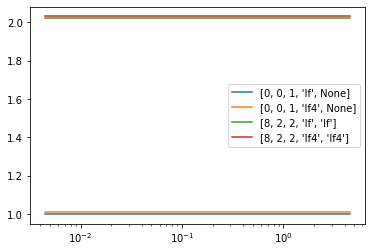

In [7]:
fig, ax = plt.subplots(1,1)
ax.set_xscale("log")
for j, setting in enumerate(settings):
    ax.plot(dts/P0,res[:,j,2]+j/100.,label="%s"%setting)
ax.legend()

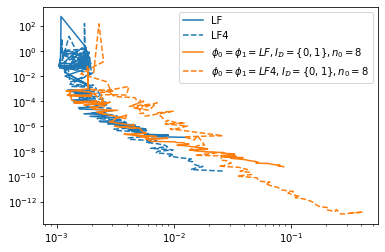

In [8]:
fig, ax = plt.subplots(1,1)
ax.set_xscale("log")
ax.set_yscale("log")
for j, setting in enumerate(settings):
    n0, N_dominant,Nmaxshells, phi0, phi1 = setting
    label = "%s"%setting
    ls = "-"
    color = colors[0]
    if n0==0 and phi0=="lf":
        label = "LF"
    if n0==0 and phi0=="lf4":
        label = "LF4"        
        ls = "--"
    if n0==8 and phi0=="lf":
        label = "$\phi_0=\phi_1=LF, I_\mathcal{D}=\{0,1\}, n_0=8$"
        color = colors[1]
    if n0==8 and phi0=="lf4":
        ls = "--"
        label = "$\phi_0=\phi_1=LF4, I_\mathcal{D}=\{0,1\}, n_0=8$"
        color = colors[1]
    ax.plot(res[:,j,1],res[:,j,0],label=label,ls=ls,color=color)

ax.legend()